## Scraping Table From Wikipedia

### Set up and get HTML

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue')
soup = BeautifulSoup(page.text, 'html')

### Find first \<table\> in the soup

In [3]:
table = soup.find('table')

### Get all \<th\> in soup and separate them between Indexes and Headers 

In [4]:
html_headers = table.find_all('th')
all_headers = [title.text.strip() for title in html_headers]
all_headers

['Rank',
 'Name',
 'Industry',
 'Revenue',
 'Profit',
 'Employees',
 'Headquarters[note 1]',
 'State-owned',
 'Ref.',
 '',
 'USD millions',
 'Revenue per worker',
 'Revenue per worker',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

In [5]:
headers = all_headers[:8]
headers[6] = headers[6][:12]
headers

['Rank',
 'Name',
 'Industry',
 'Revenue',
 'Profit',
 'Employees',
 'Headquarters',
 'State-owned']

In [6]:
ids = all_headers[13:]

### Get all data on a list

In [7]:
table_data = table.find_all('tr')
data = []

for row in table_data:
    table_row_data = row.find_all('td')
    row_data = [data.text.strip().replace('$', "").replace(",", "").replace("−", "-").replace("–", "-") for data in table_row_data]

    # Getting alt value from imgs on 'State-Owned' datas, if exists on line
    try:
        row_data[6] = table_row_data[6].get('data-sort-value')
    except:
        continue

    data.append(row_data[:7])

data

[['Walmart', 'Retail', '611289', '11680', '2100000', 'United States', 'No'],
 ['Saudi Aramco',
  'Oil and gas',
  '603651',
  '159069',
  '70496',
  'Saudi Arabia',
  'Yes'],
 ['State Grid Corporation of China',
  'Electricity',
  '530009',
  '8192',
  '870287',
  'China',
  'Yes'],
 ['Amazon', 'Retail', '513983', '-2722', '1541000', 'United States', 'No'],
 ['Vitol', 'Commodities', '505000', '15000', '1560', 'Switzerland', 'No'],
 ['China National Petroleum Corporation',
  'Oil and gas',
  '483019',
  '21080',
  '1087049',
  'China',
  'Yes'],
 ['China Petrochemical Corporation',
  'Oil and gas',
  '471154',
  '9657',
  '527487',
  'China',
  'Yes'],
 ['ExxonMobil',
  'Oil and gas',
  '413680',
  '55740',
  '63000',
  'United States',
  'No'],
 ['Apple', 'Electronics', '394328', '99803', '164000', 'United States', 'No'],
 ['Shell', 'Oil and gas', '386201', '20120', '93000', 'United Kingdom', 'No'],
 ['UnitedHealth Group',
  'Healthcare',
  '324162',
  '20120',
  '400000',
  'United St

## Analyse Data

### Set up pandas and numpy to build the DataFrame

In [8]:
import pandas as pd
import numpy as np

In [9]:
matrix = np.matrix(data)
df = pd.DataFrame(matrix, columns=headers[1:], index=ids)
df[headers[0]] = ids

df[["Revenue", "Profit", "Employees", "Rank"]] = df[["Revenue", "Profit", "Employees", "Rank"]].apply(pd.to_numeric, errors='coerce')

In [10]:
df['State-owned'] = df['State-owned'].apply(lambda x: 1 if x == "Yes" else 0)

Save csv for backup

In [11]:
df.to_csv("./DataFrames/LargestCompanies2023.csv")

### Now to some visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df.head()

,Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Rank
1,Walmart,Retail,611289,11680.0,2100000,United States,0,1
2,Saudi Aramco,Oil and gas,603651,159069.0,70496,Saudi Arabia,1,2
3,State Grid Corporation of China,Electricity,530009,8192.0,870287,China,1,3
4,Amazon,Retail,513983,-2722.0,1541000,United States,0,4
5,Vitol,Commodities,505000,15000.0,1560,Switzerland,0,5


#### Note that Profit and Revenue are in USD Millions

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          50 non-null     object 
 1   Industry      50 non-null     object 
 2   Revenue       50 non-null     int64  
 3   Profit        48 non-null     float64
 4   Employees     50 non-null     int64  
 5   Headquarters  50 non-null     object 
 6   State-owned   50 non-null     int64  
 7   Rank          50 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.5+ KB


Revenue and Profit are in USD.

In [15]:
df.describe()

,Revenue,Profit,Employees,State-owned,Rank
count,50.000000,48.000000,5.000000e+01,50.00000,50.00000
mean,274052.340000,20835.437500,3.200794e+05,0.30000,25.50000
std,124926.376138,29639.554822,3.940428e+05,0.46291,14.57738
min,157403.000000,-2722.000000,1.560000e+03,0.00000,1.00000
25%,176779.500000,4001.750000,7.029725e+04,0.00000,13.25000
50%,236358.000000,12067.000000,2.208800e+05,0.00000,25.50000
75%,315328.250000,20221.500000,3.828730e+05,1.00000,37.75000
max,611289.000000,159069.000000,2.100000e+06,1.00000,50.00000


In [16]:
top5_countries = df.Headquarters.value_counts().head(5)
top5_countries

Headquarters
United States     20
China             13
Germany            4
Switzerland        2
United Kingdom     2
Name: count, dtype: int64

<Axes: title={'center': 'Biggest Companies By Revenue'}, xlabel='Name', ylabel='Revenue'>

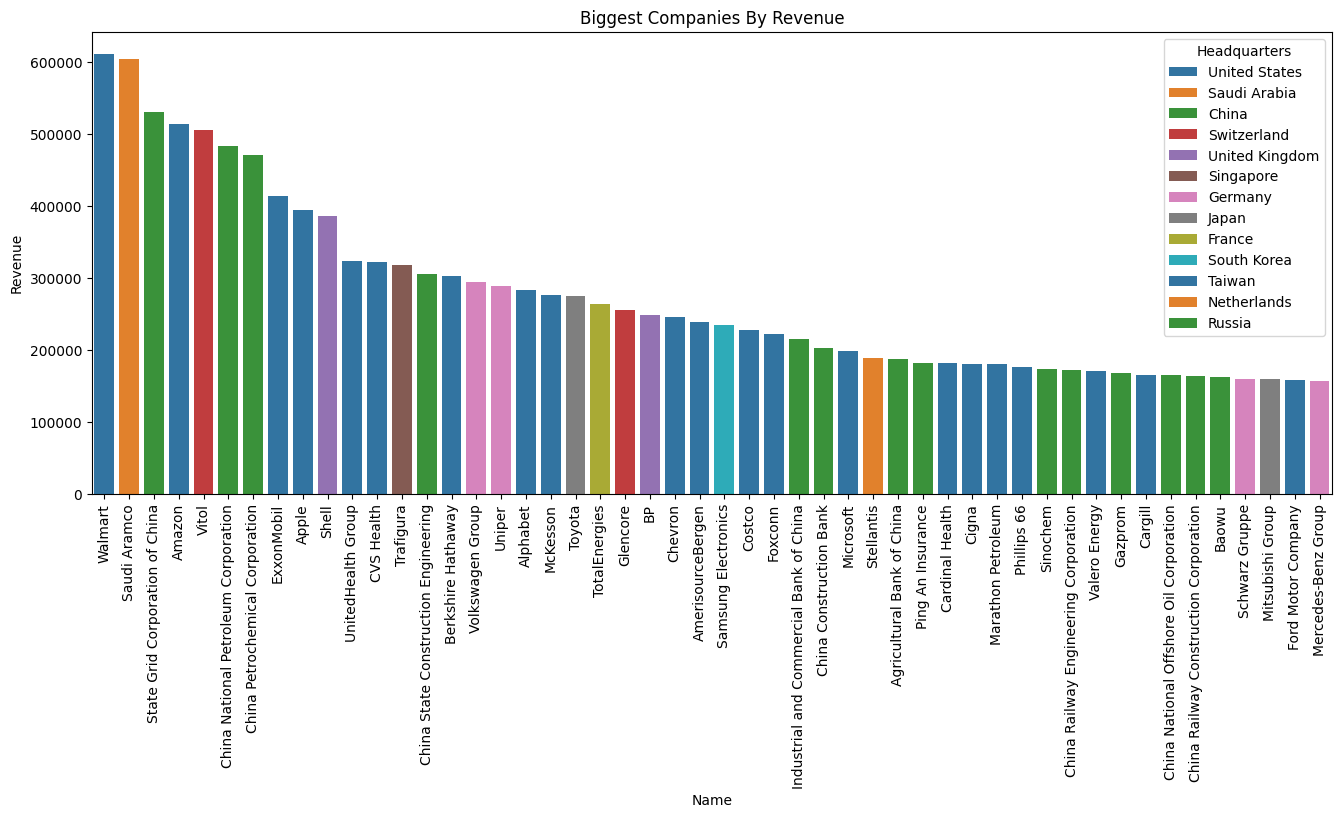

In [17]:
plt.figure(figsize=(16,6))
ax = sns.barplot(data=df, x='Name', y='Revenue', hue='Headquarters', palette=sns.color_palette(n_colors=13))
ax.tick_params(axis='x', rotation=90)
ax.set(title="Biggest Companies By Revenue")
ax

/tmp/ipykernel_10425/12123616.py:3: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  ax1 = sns.barplot(data=df[df["State-owned"] == True], ax=ax[0],
/tmp/ipykernel_10425/12123616.py:9: UserWarning: The palette list has more values (35) than needed (11), which may not be intended.
  ax2 = sns.barplot(


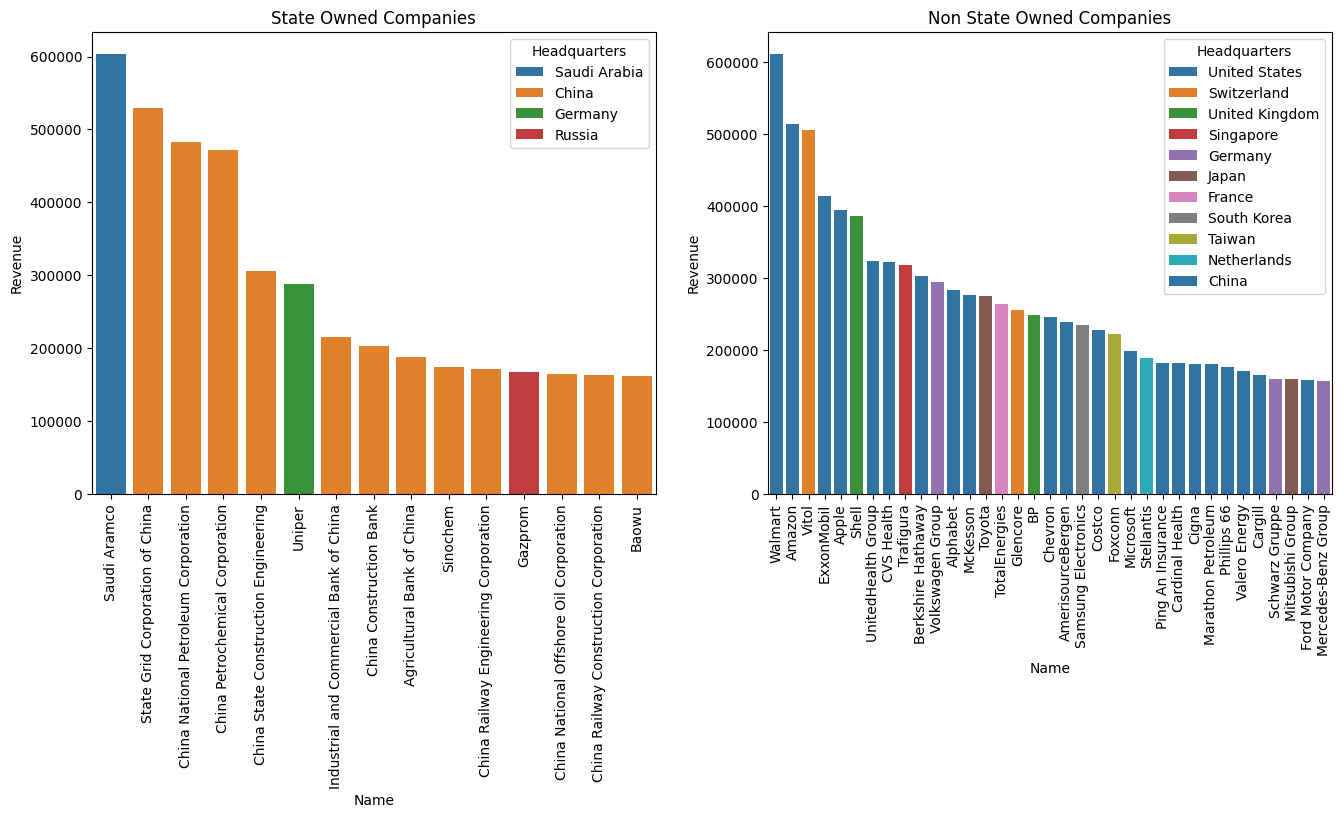

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

ax1 = sns.barplot(data=df[df["State-owned"] == True], ax=ax[0],
            x='Name', y='Revenue', hue='Headquarters',
            palette=sns.color_palette(n_colors=len(df[df["State-owned"] == True])))
ax1.set(title="State Owned Companies")
ax1.tick_params(axis='x', rotation=90)

ax2 = sns.barplot(
    data=df[df["State-owned"] == False], ax=ax[1],
    x='Name', y='Revenue', hue='Headquarters',
    palette=sns.color_palette(n_colors=len(df[df["State-owned"] == False])))
ax2.set(title="Non State Owned Companies")
ax2.tick_params(axis='x', rotation=90)

<Axes: >

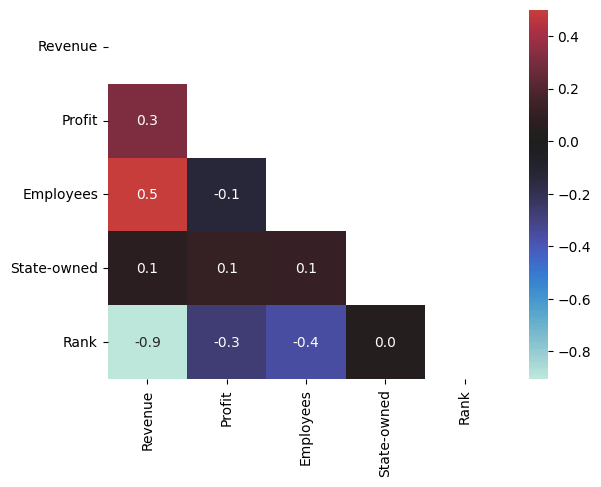

In [19]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0)

[Text(0.5, 1.0, 'Rank and Profit')]

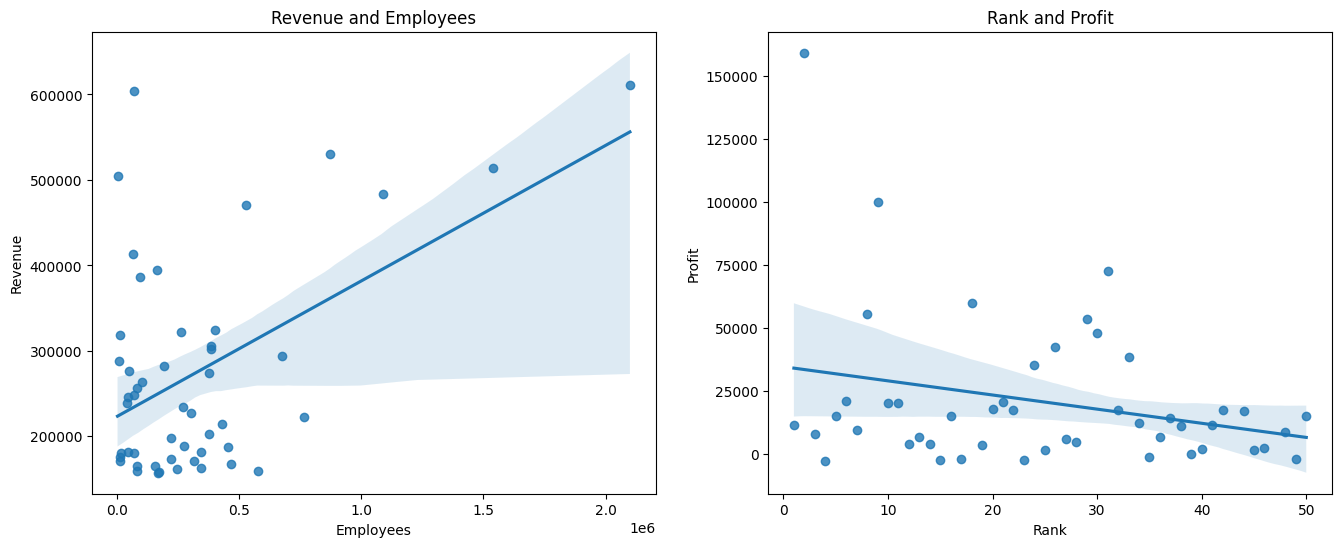

In [20]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.regplot(data=df, x="Employees", y="Revenue", ax=ax[0]).set(title="Revenue and Employees")
sns.regplot(data=df, x="Rank", y="Profit", ax=ax[1]).set(title="Rank and Profit")

[Text(0.5, 1.0, 'State-owned influence over revenue')]

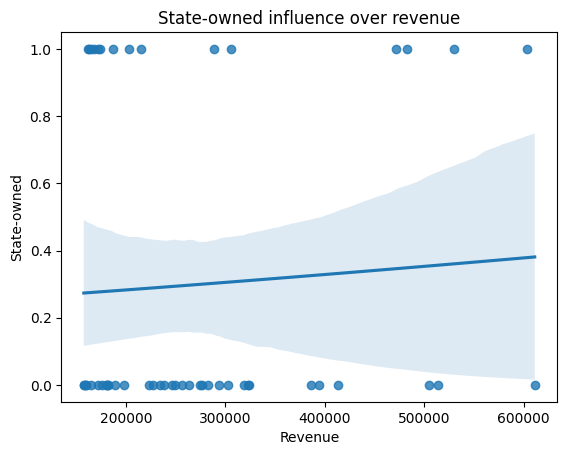

In [21]:
sns.regplot(x=df.Revenue, y=df["State-owned"], logistic=True).set(title="State-owned influence over revenue")